In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import log,sqrt,exp

In [2]:
im=Image.open("C:\\Users\\Nam Le\\color.JPG")
a=np.array(im)
print(a.shape)
print(a.min())
print(a.max())

(3264, 2448, 3)
0
255


In [3]:
def not_eight_points(i,j):
    return not ((i in [800,1700]) and (j in [50,800,1700,2500]))

In [4]:
for i in range(2448):
    for j in range(3264):
        if not_eight_points(i,j):
            a[j,i]=0

In [5]:
def dis(i,j):
    return sqrt((i[0]-j[0])**2+(i[1]-j[1])**2)
r=np.zeros((2448,3264,8))
r=r.astype("uint64")
t=([800,50],[800,800],[800,1700],[800,2500],[1700,50],[1700,800],[1700,1700],[1700,2500])
s=np.array([a[50,800],a[800,800],a[1700,800],a[2500,800],a[50,1700],a[800,1700],a[1700,1700],a[2500,1700]])
s=np.transpose(s)

In [6]:
for i in range(2448):
    for j in range(3264):
        if not_eight_points(i,j):
            r[i,j]=[dis([i,j],t[0]),dis([i,j],t[1]),dis([i,j],t[2]),dis([i,j],t[3]),dis([i,j],t[4]),dis([i,j],t[5]),dis([i,j],t[6]),dis([i,j],t[7])]
for i in range(2448):
    for j in range(3264):
        if not_eight_points(i,j):
            mnpq=1/(1+r[i,j]**2)
            v=sum(mnpq)
            a[j,i]=(s@mnpq)/v

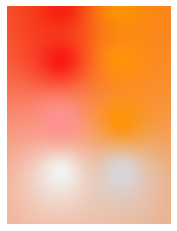

In [7]:
a=a.astype(np.uint8)
plt.imshow(a)
plt.axis('off')
plt.show()

In [8]:
for i in range(2448):
    for j in range(3264):
        if not_eight_points(i,j):
            mnpq=sqrt(1+(r[i,j]**2))
            v=sum(mnpq)   
            a[j,i]=(s@mnpq)/v

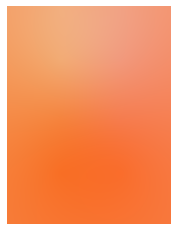

In [9]:
plt.imshow(a)
plt.axis("off")
plt.show()

In [10]:
for i in range(2448):
    for j in range(3264):
        if not_eight_points(i,j):
            mnpq=(r[i,j]**2)*log(r[i,j])
            v=sum(mnpq)
            a[j,i]=(s@mnpq)/v

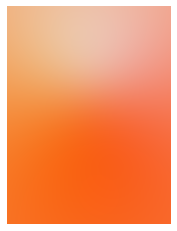

In [11]:
plt.imshow(a)
plt.axis("off")
plt.show()

In [12]:
for i in range(2448):
    for j in range(3264):
        if not_eight_points(i,j):
            mnpq=exp(-1/10000*r[i,j]**2)
            v=sum(mnpq)
            a[j,i]=(s@mnpq)/v

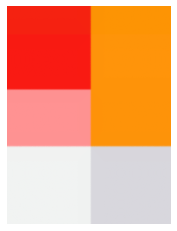

In [13]:
plt.imshow(a)
plt.axis("off")
plt.show()